In [ ]:
!python --version

Python 3.7.10


In [ ]:
import numpy as np
import pandas as pd

# Carregando a ABT

In [ ]:
# carrega a abt
df_abt = pd.read_csv('/content/drive/MyDrive/projeto-ia-datasets/olist/output/propensao_revenda_abt.csv')

# pega a base de treinamento
df_train = df_abt.query('data_ref_safra < "2018-03-01"')

# pega a base de avaliação (out of time)
df_oot   = df_abt.query('data_ref_safra == "2018-03-01"')

# Identificando as Variáveis de Modelagem

In [ ]:
key_vars = ['data_ref_safra', 'seller_id']
num_vars = ['tot_orders_12m', 'tot_items_12m', 'tot_items_dist_12m', 'receita_12m', 'recencia']
cat_vars = ['uf']
target = 'nao_revendeu_next_6m'

features = cat_vars + num_vars

# Instalando o Pycaret no Colab

Vamos instalar a versão completa pycaret de acordo com as instruções na [installation page](https://pycaret.readthedocs.io/en/latest/installation.html)

In [ ]:
!pip install pycaret[full]==2.3.1

In [ ]:
import pycaret
pycaret.__version__

'2.3.1'

In [ ]:
# não precisa mais executar esse código
# for Google Colab only
# from pycaret.utils import enable_colab 
# enable_colab()

Colab mode enabled.


# Usando o PyCaret

O **PyCaret** possui a função `setup`, que serve para definirmos os tipos de variáveis, pré-processamento das variáveis e muito mais!

In [ ]:
# importando todas as funções do módulo classification da biblioteca pycaret
from pycaret.classification import *

exp_setup = setup(data=df_train, test_data=df_oot, target=target, 
                  ignore_features=key_vars, categorical_features=cat_vars, numeric_features=num_vars, session_id=42)

,Description,Value
0,session_id,42
1,Target,nao_revendeu_next_6m
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(3495, 9)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
type(exp_setup)

tuple

In [ ]:
len(exp_setup)

42

Podemos sempre rever qual a configuração do experimento que estamos realizado com o comando `help(get_config)`

In [ ]:
help(get_config)

Help on function get_config in module pycaret.classification:

get_config(variable: str)
    This function retrieves the global variables created when initializing the 
    ``setup`` function. Following variables are accessible:
    
    - X: Transformed dataset (X)
    - y: Transformed dataset (y)  
    - X_train: Transformed train dataset (X)
    - X_test: Transformed test/holdout dataset (X)
    - y_train: Transformed train dataset (y)
    - y_test: Transformed test/holdout dataset (y)
    - seed: random state set through session_id
    - prep_pipe: Transformation pipeline
    - fold_shuffle_param: shuffle parameter used in Kfolds
    - n_jobs_param: n_jobs parameter used in model training
    - html_param: html_param configured through setup
    - create_model_container: results grid storage container
    - master_model_container: model storage container
    - display_container: results display container
    - exp_name_log: Name of experiment
    - logging_param: log_experiment par

Com a função `get_config`, podemos buscar qualquer um dos objetos de configuração. Podemos buscars os dados transformados:

In [ ]:
get_config('X')

,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,uf_AM,uf_BA,uf_CE,uf_DF,uf_ES,uf_GO,uf_MA,uf_MG,uf_MS,uf_MT,uf_PA,uf_PB,uf_PE,uf_PI,uf_PR,uf_RJ,uf_RN,uf_RO,uf_RS,uf_SC,uf_SE,uf_SP
0,3.0,3.0,1.0,2685.000000,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,171.0,207.0,9.0,21275.230469,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.0,42.0,15.0,781.799988,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,1.0,120.000000,16.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,130.0,141.0,75.0,16228.879883,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3490,10.0,10.0,5.0,9976.799805,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3491,2.0,2.0,2.0,84.800003,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3492,8.0,9.0,7.0,1254.099976,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3493,10.0,10.0,2.0,1359.900024,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Também o pipeline de preparação dos dados:

In [ ]:
get_config('prep_pipe')

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['uf'],
                                      display_types=True,
                                      features_todrop=['data_ref_safra',
                                                       'seller_id'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['tot_orders_12m',
                                                          'tot_items_12m',
                                                          'tot_items_dist_12m',
                                                          'receita_12m',
                                                          'recencia'],
                                      target='nao_revendeu_next_6m',
                                      time_features=[])),
                ('impu...
                ('scaling', 'passthr

# Treinando Vários Modelos

A função `compare_models()` irá treinar vários modelos, avaliá-los usando cross-validation e retornar o melhor modelo. Os modelos são treinados usando apenas os dados de treino. 
Essa função imprime uma tabela com os resultados de todos os modelos e retorna o melhor modelo de acordo com a métrica passada no parâmetro `sort`. Por padrão, ela escolhe o melhor modelo usando a `acurácia`, mas vamos pedir pra ele retornar o modelo com a melhor `auc`.

In [ ]:
compare_models(fold=5, sort='auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8509,0.9220,0.7756,0.8231,0.7985,0.6804,0.6813,0.774
xgboost,Extreme Gradient Boosting,0.8518,0.9210,0.7973,0.8108,0.8038,0.6847,0.6851,5.238
et,Extra Trees Classifier,0.8567,0.9189,0.7793,0.8340,0.8056,0.6923,0.6934,0.732
catboost,CatBoost Classifier,0.8455,0.9180,0.7816,0.8073,0.7941,0.6705,0.6709,3.500
lightgbm,Light Gradient Boosting Machine,0.8466,0.9159,0.7876,0.8059,0.7965,0.6735,0.6737,0.204
gbc,Gradient Boosting Classifier,0.8352,0.9127,0.7681,0.7936,0.7803,0.6485,0.6491,0.400
lda,Linear Discriminant Analysis,0.8103,0.8979,0.5803,0.8816,0.6997,0.5696,0.5963,0.034
ada,Ada Boost Classifier,0.8223,0.8974,0.7425,0.7821,0.7611,0.6199,0.6212,0.210
lr,Logistic Regression,0.8246,0.8970,0.6539,0.8515,0.7396,0.6108,0.6230,0.864
nb,Naive Bayes,0.5525,0.8662,0.9474,0.4582,0.6176,0.2132,0.3049,0.022


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Caso queiramos os resultados printados na tabela em um dataframe, basta apenas executarmos a função `pull` depois de qualquer resultado impresso.

In [ ]:
compare_models_results = pull()
compare_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8509,0.9220,0.7756,0.8231,0.7985,0.6804,0.6813,0.774
xgboost,Extreme Gradient Boosting,0.8518,0.9210,0.7973,0.8108,0.8038,0.6847,0.6851,5.238
et,Extra Trees Classifier,0.8567,0.9189,0.7793,0.8340,0.8056,0.6923,0.6934,0.732
catboost,CatBoost Classifier,0.8455,0.9180,0.7816,0.8073,0.7941,0.6705,0.6709,3.500
lightgbm,Light Gradient Boosting Machine,0.8466,0.9159,0.7876,0.8059,0.7965,0.6735,0.6737,0.204
gbc,Gradient Boosting Classifier,0.8352,0.9127,0.7681,0.7936,0.7803,0.6485,0.6491,0.400
lda,Linear Discriminant Analysis,0.8103,0.8979,0.5803,0.8816,0.6997,0.5696,0.5963,0.034
ada,Ada Boost Classifier,0.8223,0.8974,0.7425,0.7821,0.7611,0.6199,0.6212,0.210
lr,Logistic Regression,0.8246,0.8970,0.6539,0.8515,0.7396,0.6108,0.6230,0.864
nb,Naive Bayes,0.5525,0.8662,0.9474,0.4582,0.6176,0.2132,0.3049,0.022


Podemos então salvar para uso futuro:

In [ ]:
compare_models_results.to_csv('/content/drive/MyDrive/projeto-ia-datasets/olist/output/compare_models_results.csv', index=False)

Vendo o melhor modelo encontrado:

O melhor modelo encontrado foi uma `Random Forest`.

In [ ]:
rf = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8484,0.9277,0.7715,0.8207,0.7954,0.6751,0.6759
1,0.8226,0.9113,0.7266,0.7918,0.7578,0.6183,0.6197
2,0.8569,0.9155,0.7669,0.8430,0.8031,0.6912,0.6931
3,0.8569,0.9277,0.8045,0.8168,0.8106,0.6957,0.6957
4,0.8698,0.9277,0.8083,0.8431,0.8253,0.7216,0.7221
Mean,0.8509,0.9220,0.7756,0.8231,0.7985,0.6804,0.6813
SD,0.0157,0.0071,0.0297,0.0191,0.0226,0.0345,0.0342


In [ ]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Perceba que as métricas na tabela acima são as mesmas apresentadas na tabela gerada no `compare_models()`.

# Otimização de Hiperparâmetros

A função `tune_model` realizar um `RandomSearch` com 10 iterações por padrão. Aumentar o número de iterações geralmente leva a chances maiores de termos modelos mais otimizados.

`RandomSearch` é uma outra versão do `GridSearch`, que ao invés de fazer uma busca completa pelo grid, irá buscar de forma aleatória pela quantidade de vezes que passarmos no parâmetro `n_iter`. Por padrão, `n_iter = 10`.

In [ ]:
tuned_rf = tune_model(rf, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8240,0.9091,0.7341,0.7903,0.7612,0.6222,0.6232
1,0.8169,0.8916,0.7603,0.7603,0.7603,0.6122,0.6122
2,0.8598,0.9073,0.7744,0.8443,0.8078,0.6978,0.6994
3,0.8469,0.9154,0.8008,0.7978,0.7992,0.6756,0.6756
4,0.8355,0.9102,0.7895,0.7807,0.7850,0.6518,0.6518
Mean,0.8366,0.9067,0.7718,0.7947,0.7827,0.6519,0.6524
SD,0.0154,0.0080,0.0233,0.0278,0.0194,0.0320,0.0323


Nâo conseguimos melhorar o modelo original. Vamos tentar aumentar a quantidade de iterações para 30.

In [ ]:
tuned_rf = tune_model(rf, fold=5, optimize='AUC', n_iter=30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8298,0.9131,0.7378,0.8008,0.7680,0.6339,0.6353
1,0.8155,0.8923,0.7640,0.7556,0.7598,0.6100,0.6100
2,0.8555,0.9086,0.7782,0.8313,0.8039,0.6897,0.6906
3,0.8426,0.9156,0.8008,0.7889,0.7948,0.6672,0.6672
4,0.8369,0.9093,0.7857,0.7857,0.7857,0.6541,0.6541
Mean,0.8361,0.9078,0.7733,0.7925,0.7824,0.6510,0.6514
SD,0.0133,0.0081,0.0213,0.0245,0.0164,0.0274,0.0275


# Analizando o Modelo e as Métricas

### Curva ROC

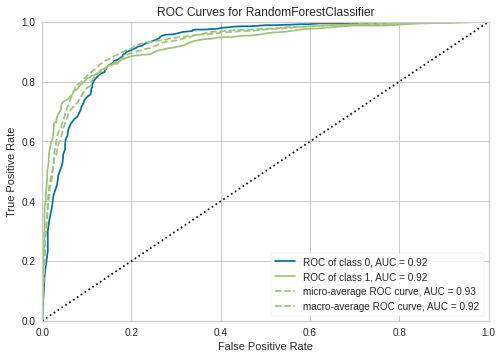

In [ ]:
plot_model(rf, plot='auc')

### Feature Importance

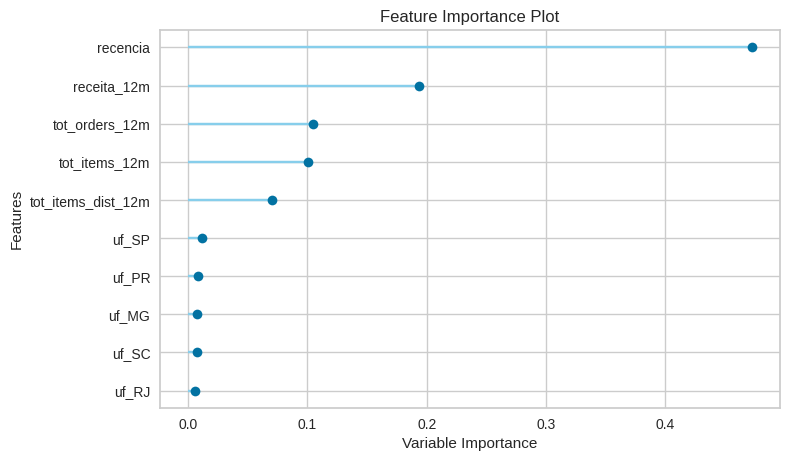

In [ ]:
plot_model(rf, plot='feature')

### Matriz de Confusão

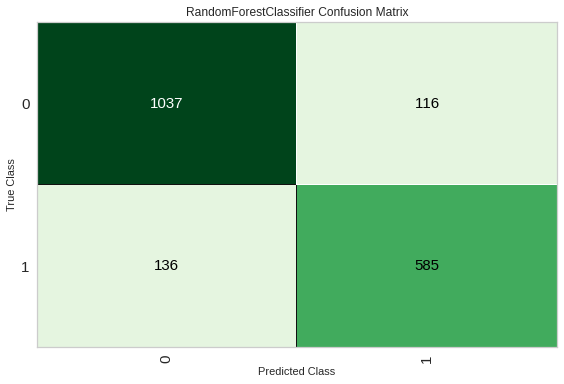

In [ ]:
# nos dados de treino
plot_model(rf, plot='confusion_matrix')

### Shap Values

Para construir o `shap_values`, precisamos de dois objetos:

1. Algoritmo treinado
2. Base de dados de teste (oot)

O algoritmo treinado no nosso caso é uma `Random Forest` (`rf`) e a nossa base de teste (oot) pode ser acessada através do comando `get_config(X_test)`.

In [ ]:
# algoritmo
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# base de teste (oot)
X_test = get_config('X_test')
X_test.head()

,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,uf_AM,uf_BA,uf_CE,uf_DF,uf_ES,uf_GO,uf_MA,uf_MG,uf_MS,uf_MT,uf_PA,uf_PB,uf_PE,uf_PI,uf_PR,uf_RJ,uf_RN,uf_RO,uf_RS,uf_SC,uf_SE,uf_SP
3495,3.0,3.0,1.0,2685.000000,133.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3496,178.0,209.0,9.0,21621.130859,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3497,44.0,48.0,20.0,1029.199951,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3498,1.0,1.0,1.0,120.000000,75.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3499,124.0,132.0,72.0,15104.919922,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# construindo o shap values
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

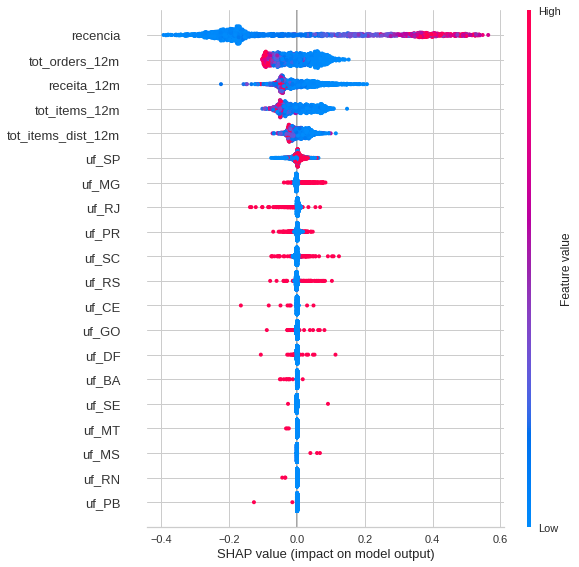

In [ ]:
# plotando o shap summary plot
shap.summary_plot(shap_values[1], X_test, plot_type='dot')

# Métricas no Conjunto de Test/Hold-Out

In [ ]:
predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8655,0.9241,0.8114,0.8345,0.8228,0.7145,0.7147


,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,uf_AM,uf_BA,uf_CE,uf_DF,uf_ES,uf_GO,uf_MA,uf_MG,uf_MS,uf_MT,uf_PA,uf_PB,uf_PE,uf_PI,uf_PR,uf_RJ,uf_RN,uf_RO,uf_RS,uf_SC,uf_SE,uf_SP,nao_revendeu_next_6m,Label,Score
0,3.0,3.0,1.0,2685.000000,133.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.78
1,178.0,209.0,9.0,21621.130859,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.98
2,44.0,48.0,20.0,1029.199951,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.94
3,1.0,1.0,1.0,120.000000,75.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.84
4,124.0,132.0,72.0,15104.919922,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,4.0,4.0,3.0,124.599998,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.75
1870,5.0,5.0,5.0,385.589996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.86
1871,11.0,12.0,8.0,1450.199951,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.93
1872,13.0,13.0,3.0,1709.869995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.89


Nosso modelo está indo muito bem mesmo na nossa base Out of Time!

# Estimativa Ganho Financeiro do Modelo

Vamos calcular o ganho financeiro do modelo imaginando que iremos usá-lo como um modelo de decisão e depois como um modelo de ordenação. Mas antes, vamos calcular a nosso custo médio quando um vendedor não realiza uma venda nos próximos 6 meses.

### Premissas

#### Premissa 1: Custo médio de não-revender

Vamos supor que a cada venda, o vendedor tenha que pagar para a Olist uma comissão média de 10%.

In [ ]:
(
    df_train
    .query('nao_revendeu_next_6m == 1')
    .assign(comissao_12m = lambda df: df['receita_12m'] * 0.10)
    .filter(['comissao_12m'])
    .mean()
)

comissao_12m    110.161276
dtype: float64

Temos então que a Olist, a cada venda ganha uma comissão média de R$ 110.

Obs: Muitas vezes esse número é fornecido pela própria galera de negócio. Então antes de realizar esse tipo de cálculo, vale sempre a pena conversar com o cliente. Aqui só fazemos a conta antes porque não temos um representante da Olist xD.

#### Premissa 2: Custo do cupom de desconto

Para cada seller que o modelo prever que não irá revender, iremos fornecer um cupom de desconto na comissão cujo custo médio é de R\$ 20.

## Estimativa de Ganho Financeiro para Modelo de Decisão

Modelos de decisão utilizam um ponto de corte na probabilidade para decidir se um dado exemplo é churn ou não. Nesse caso, utilizamos a matriz de confusão para calcular o ganho financeiro.

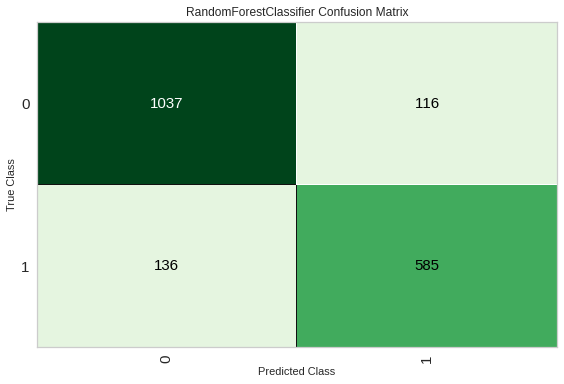

In [ ]:
plot_model(rf, plot='confusion_matrix')

Dos 721 sellers que de fato não revenderam, o modelo identificou corretamente 585 (81%). Caso o modelo tivesse atuado no mês março/2018 (base oot), a perda de comissão teria caído de 721 * R\$ 110 = **R\$ 79.310,00** para 136 * R\$ 110 = **R\$ 14.960,00**, gerando uma `economia bruta` de **R\$ 64.350,00**, o que representa 81% da perda de comisão.

Podemos incluir também o custo de termos oferecido o cupom de desconto para os **Verdadeiros Positivos** e **Falso Positivos**, respectivamente, **585** e **116** sellers. Esse termo representa o `custo de atuação do modelo`, que é de (585 + 116) \* R\$ 20 = **R\$ 14.020,00**.

Com a `economia bruta` em mãos e o `custo de atuação do modelo`, podemos calcular a `economia líquida ou efetiva`:

`economia líquida` = `economia bruta` - `custo de atuação do modelo`

`economia líquida` = R\$ 65.350,00 - R\$ 14.020,00 = **R\$ 50.330,00**, o que representa uma 63% da perda de comissão.

Em outras palavras, caso o modelo tivesse em produção e atuado já na safra de março/2018, do total de comissão perdida de **R\$ 79.310,00**, economizaríamos **R\$ 50.330,00** em apenas um mês, o que extrapolando para o ano dá o valor de 12 * **R\$ 50.330,00** = **R\$ 603.960,00** que não iriam pelo ralo devido apenas a atuação do modelo.


Observação:
*Esse custo foi calculado assumindo que o modelo será usado para tomada de decisão automática, com um ponto de corte de 0.5. Mudando esse ponto de corte, a matriz de confusão juntamente com as métricas irá mudar, ocasionando em outros valores piores ou melhores de economia efetiva*.

Caso o modelo seja usado para ordenar os vendedores em nossa base de acordo com a maior probabilidade de dar churn, permitindo assim uma atuação preventiva sob um percentual da base, podemos utilizar a curva de ganhos cumulativos:

## Estimativa de Ganho Financeiro para Modelo de Ordenação

Modelos de ordenação não utilizam ponto de corte sobre a probabilidade. Quando o modelo é usado de forma ordenada ele não toma a decisão final e ao invés disso, apenas fornece o score/probabilidade de um dado seller não revender. Geralmente um analista ou outro sistema toma a decisão de **se** e **como** atua sobre o exemplo. Nesse caso utilizamos a curva de ganhos cumulativos.

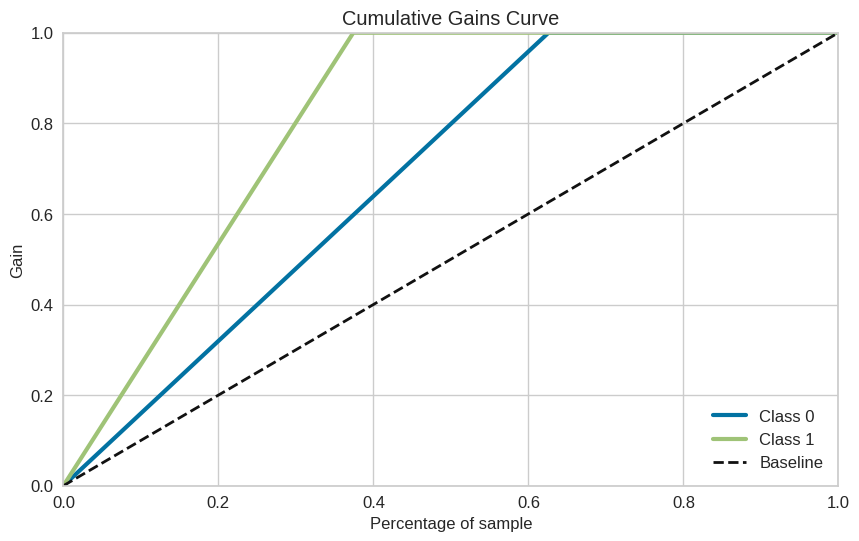

In [ ]:
plot_model(rf, plot='gain')

Atuando em torno de 39% da base ordenada de forma descendente pela probabilidade de não revenda, conseguiríamos identificar 100% dos sellers que não revenderam no mês de março/2018.

In [ ]:
# quantos sellers de fato não revenderam: 721
df_oot['nao_revendeu_next_6m'].value_counts()

0    1153
1     721
Name: nao_revendeu_next_6m, dtype: int64

In [ ]:
# passando o corte de 39% na base ordenada, será que conseguimos realmente identificar todos os 721 sellers 
# que não revenderam, como indica a figura?
(
    predict_model(rf, data=df_oot)
    .assign(score_label1 = lambda df: np.where(df['nao_revendeu_next_6m'] == 1, df['Score'], 1-df['Score']))
    # ordenando a base
    .sort_values(by='score_label1', ascending=False)
    # passando o corte em 39% da base ordenada
    .head(int(len(df_oot) * 0.39))
    # calculando a frequência
    .filter(['nao_revendeu_next_6m'])
    .value_counts()
)

nao_revendeu_next_6m
1                       721
0                         9
dtype: int64

De fato conseguimos! Selecionando 39% da base ordenada, conseguimos detectar todos os 721 sellers que não revenderam, com um residual de 9 falsos positivos.

Iremos enviar o cupom de desconto na comissão para 730 sellers (que representam 39% da base ordenada). Isso nos gera um `custo de atuação do modelo` de 730 * R\$ 20 = **R\$ 14.600,00**. Com esse custo, conseguimos evitar que todos os sellers não revendam, ou seja, eliminamos a perda de comissão de **R\$ 79.310,00**, gerando uma economia de R\$ 79.310,00 - R\$ 14.600,00 = **R\$ 64.710,00** no mês, o que extrapolando para o ano dá 12 * R\$ 64.710,00= **R\$ 776.520,00** de economia.

# Finalizando o Modelo

A função `finalize_model` irá treinar o modelo em toda a nossa base de dados. Ou seja, iremos juntar os dados de treino e teste para finalizar o treinamento do modelo.

In [ ]:
final_model = finalize_model(rf)

Agora podemos salvar esse modelo para ser usado em produção:

In [ ]:
save_model(final_model, '/content/drive/MyDrive/projeto-ia-datasets/olist/output/modelo_final')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['uf'],
                                       display_types=True,
                                       features_todrop=['data_ref_safra',
                                                        'seller_id'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['tot_orders_12m',
                                                           'tot_items_12m',
                                                           'tot_items_dist_12m',
                                                           'receita_12m',
                                                           'recencia'],
                                       target='nao_revendeu_next_6m',
                                       time_features=[])),
                 ('impu...
                  Ra

# Links Importantes

* [PyCaret Documentation](https://pycaret.org/)
* [Installation Page](https://pycaret.readthedocs.io/en/latest/installation.html)
* [Tutoriais](https://pycaret.readthedocs.io/en/latest/tutorials.html#classification)